# Part II - (Flights Dataset)

## by (Michelle Ezeokeke)


## Investigation Overview


Have you ever arrived at the airport 2 hours or more before your arrival time and can't wait to hop on the plane maybe for that  business trip or vacation but got disappointed due to delays or cancellation making all that exictment drop? My explanatory analysis will focus on the causes of this delay and cancellation and factors that may likely influence them.

For this presentation, i'll focus on the the delays and the factors that may influence them. I'll start by introducing the total number of airlines in my dataset, followed by the different types of delay experienced.I'll also introduce total amount of flights cancelled and the major reasons for cancellation.

Afterwards i'll introduce possible factors that can influence or cause delays with focus on engine type, where i'll show types of engine used by the airlines.My presentation will convey all important information with the right plots to make all points made clear.


## Dataset Overview

This dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays in the year 2008.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe

df_2008 = pd.read_csv("2008.csv")
df_plane = pd.read_csv("plane-data.csv")


In [3]:
df_plane.rename(columns = {"tailnum":"TailNum"}, inplace =True)

In [4]:
# merge flights and plane dataset

df_2008 = pd.merge (df_2008, df_plane, on ='TailNum', how ='left')

In [5]:
flights = df_2008.copy()

In [6]:
flights.drop_duplicates(keep = "first", inplace =True)

flights.drop(columns=["TailNum","TaxiIn", "TaxiOut", "Diverted","model","type","issue_date","status"],inplace=True, errors = 'ignore');

In [7]:
flights['Month'] = pd.to_datetime(flights['Month'],format = '%m').dt.month_name().str.slice(stop=3)

days = {1:'Mon', 2: 'Tues', 3:'Wed', 4:'Thurs', 5:'Fri', 6:'Sat', 7:'Sun'}
flights['DayOfWeek'] = flights['DayOfWeek'].map(days)

##  Airlines


A total number of 20 airlines were represented in my dataset. The Carrier with the most flight count is WN (southwest Airlines) with least being AQ (Aloha airlines).


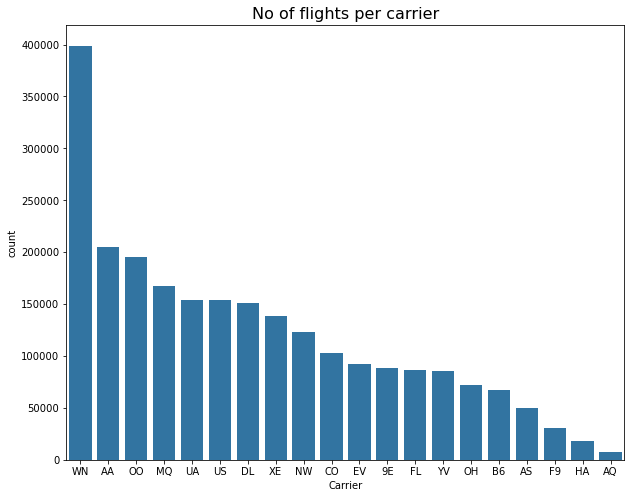

In [8]:
# store counts of filtered data in a var name

carrier = flights['UniqueCarrier'].value_counts().index

# set base color to blue

base_color = sb.color_palette()[0]

#plot chart showing total number of carriers

plt.figure(figsize=(10,8))

ax = sb.countplot(data = flights, x='UniqueCarrier', color = base_color , order = carrier)
ax.set_xlabel('Carrier')
ax.set_title('No of flights per carrier', size =16)

plt.show()

## Delay 


According to the Federal Aviation Administration (FAA) any delay more than 15 minutes it's scheduled time is classified as the delay.The delay types are classified into 5 categories carrier delay, weather delay, NAS delay, security delay and Late Aircraft delay.Let's have a insight on what each delay means.

- Carrier delay - When the cause of the cancellation or delay was due to circumstances within the airline's control (e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.)

- Weather Delay - Significant meteorological conditions (actual or forecasted) that, in the judgment of the carrier, delays or prevents the operation of a flight such as tornado, blizzard or hurricane.

- National Aviation System (NAS) Delay: Delays and cancellations attributable to the national aviation system that refer to a broad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control.

- Late Aircraft Delay - A previous flight with same aircraft arrived late, causing the present flight to depart late.

- Security Delay - Delays or cancellations caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.

The bar visualization represents the average delay time in minutes for each of the delay types.

[Delay definition Source](https://www.bts.gov/topics/airlines-and-airports/understanding-reporting-causes-flight-delays-and-cancellations)


In [9]:
#query arrival delay greater than 15 mins according to FAA standard

df_delay = flights.query('ArrDelay>= 15')

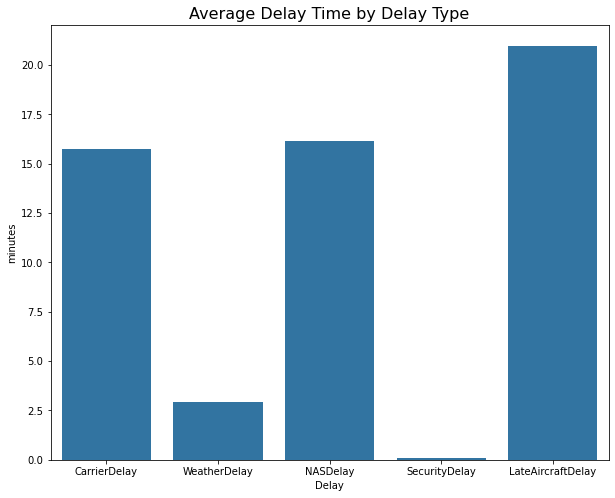

In [10]:
# query all delays and get mean values

delays = df_delay[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']].mean().rename_axis('Delay').reset_index(name = 'minutes')

fig, ax = plt.subplots(figsize=(10,8))

sb.barplot(delays['Delay'], delays['minutes'], color = base_color)
plt.ylabel = ('Average(minutes)')
plt.xlabel = ('Delay Types')
plt.title('Average Delay Time by Delay Type', size =16 )

plt.show()


### Arrival Delay and Delay types

As earlier introduced the delay types in my next visualization will show how each delay type affects arrivals of aircrafts.
From the violin plot,it shows that weather delay accounted for most of the arrivals delays when compared to other delays while the security was the least affected. 

In other to give a clearer pictures of this variables of interest, a normal scale and log scale plot were both plotted.


In [11]:
all_delays = pd.melt(df_delay, id_vars = ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime','ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum','ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
'DepDelay', 'Origin', 'Dest', 'Distance', 'Cancelled','CancellationCode','manufacturer', 'aircraft_type', 'engine_type', 'year'], value_vars=['CarrierDelay', 'WeatherDelay',
'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], var_name = 'Delay_type', value_name ='Delay')

all_delays['Delay_type'] = all_delays['Delay_type'].str[:-5]

all_delays =all_delays[all_delays.Delay>0]

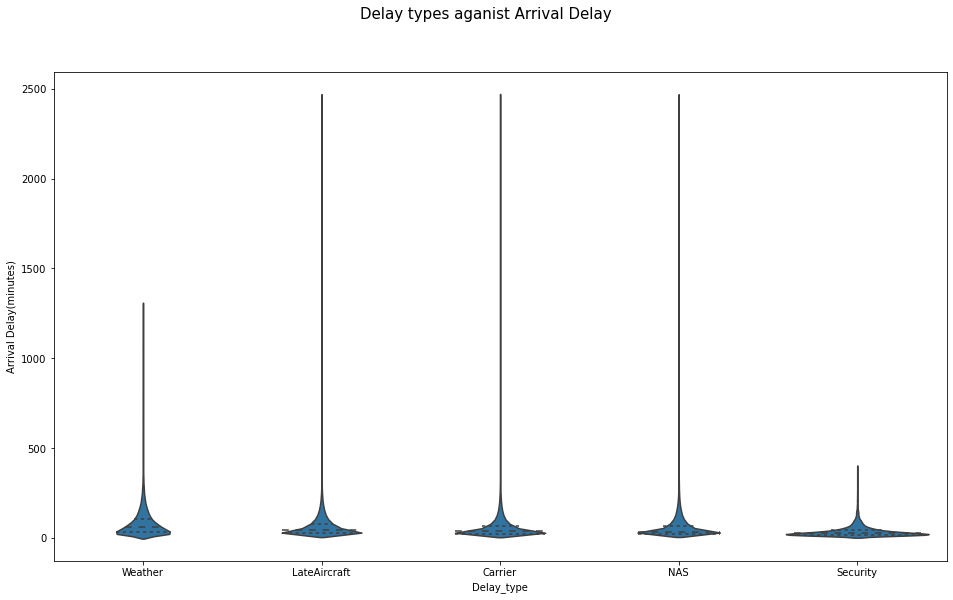

In [12]:
# violin plot

fig,ax = plt.subplots(figsize=(16,9))

order1 = all_delays.groupby('Delay_type')['ArrDelay'].mean().sort_values(ascending = False).index
sb.violinplot(data = all_delays, x='Delay_type', y = 'ArrDelay', order = order1, color = base_color,inner='quartile')

plt.suptitle('Delay types aganist Arrival Delay', size=15);

ax.set_ylabel('Arrival Delay(minutes)')

plt.show()


### Delays by Airlines

Now let's have a closer look at delay types across all airlines and see which had the most effect. 

With the aid of a the multivariate box plot we are able to see how each delay affects each carrier and the weather delay had the most effect in most of the carriers while security came last too in most carriers too.


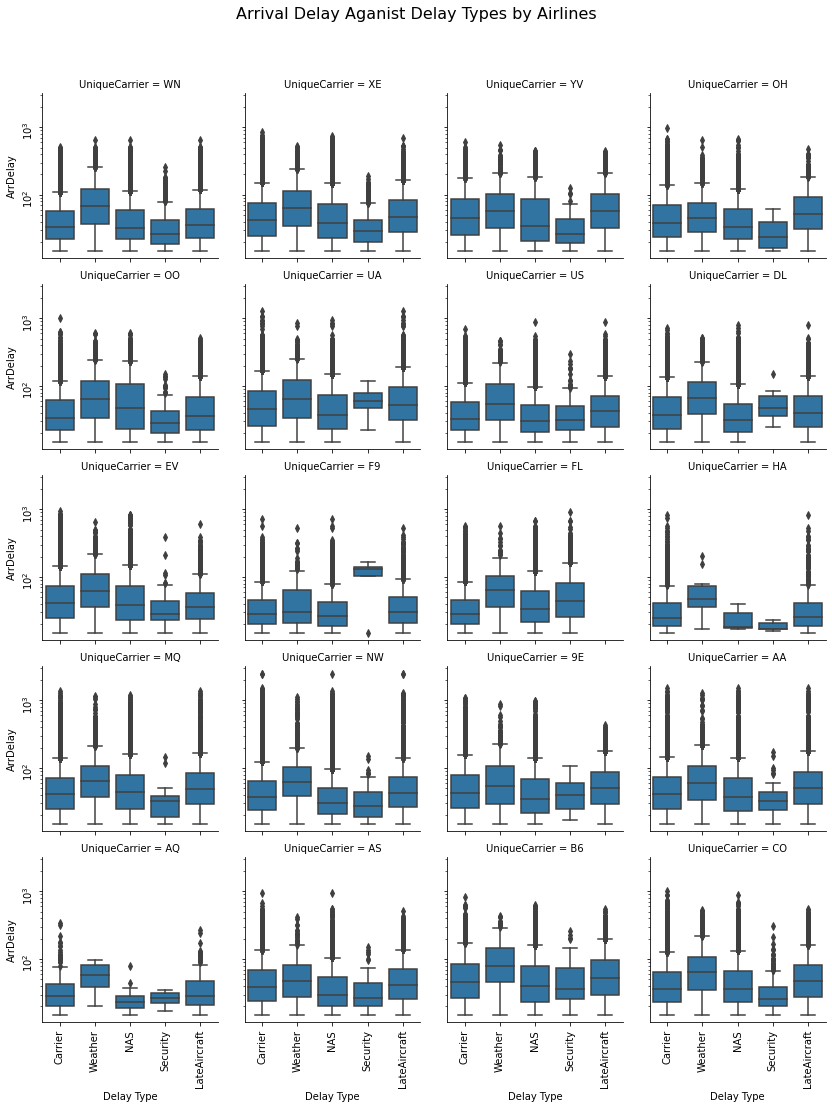

In [13]:
g = sb.FacetGrid(data=all_delays, col='UniqueCarrier', col_wrap=4)
g.map(sb.boxplot, 'Delay_type', 'ArrDelay')
plt.yscale('log');
plt.subplots_adjust(top=0.9)
plt.suptitle('Arrival Delay Aganist Delay Types by Airlines', size=16);

# set_facet_title()

# # Set axes and tick labels
axes = g.axes.flat

for ax in axes:
    ax.tick_params(rotation=90)
    ax.set_xlabel('Delay Type')
    
plt.show()

## Weather Delays

Based on my previous analysis weather is said to have taken the gold medal for the major cause of delays in most airlines but i'll like to know what factors could likely influence this delays. 

#### Month and Day of the Week

The point plot visulaization shows which month of the year and day of week is likely to have a spike in weather delay occurence and it shows February and Friday. Further research shows February to be a period in winter. Could this possible be the reason for the spike in delays?





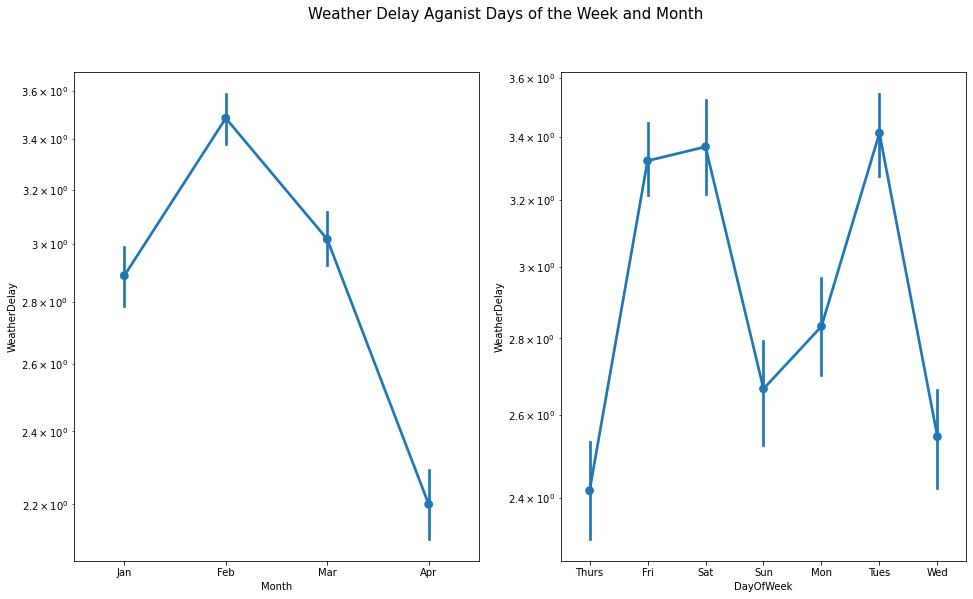

In [14]:
#point plot

fig,ax = plt.subplots(1,2, figsize=(16,9))

sb.pointplot(data = df_delay, x = 'Month', y='WeatherDelay',ax=ax[0])
sb.pointplot(data = df_delay, x= 'DayOfWeek', y = 'WeatherDelay', ax =ax[1])
ax[0].set_yscale('log')
ax[1].set_yscale('log')
plt.suptitle('Weather Delay Aganist Days of the Week and Month', size=15);

plt.show()

##  Relationship between variables

One question i also considered asking is could distance or airtime or departure time influence this delays? This lead me to the next visualization to study the relationship between some variables of interest.

Using a pair Grid i was able to see how a variable had influenced another variable.

Distance and Airtime had a strong positive relationship meaning that the longer the distance the more the airtime.

Arrival Delay and Departure delay showed a positive relationship meaning that if an aircraft depart from it's origin airport arrival delay tends to occur. 

Does distance Influence delays? from the plot it shows distance between airports have no relationship 

Arrival Delay and Departure delays also have weak to moderate relationships between the delays excluding security delay.


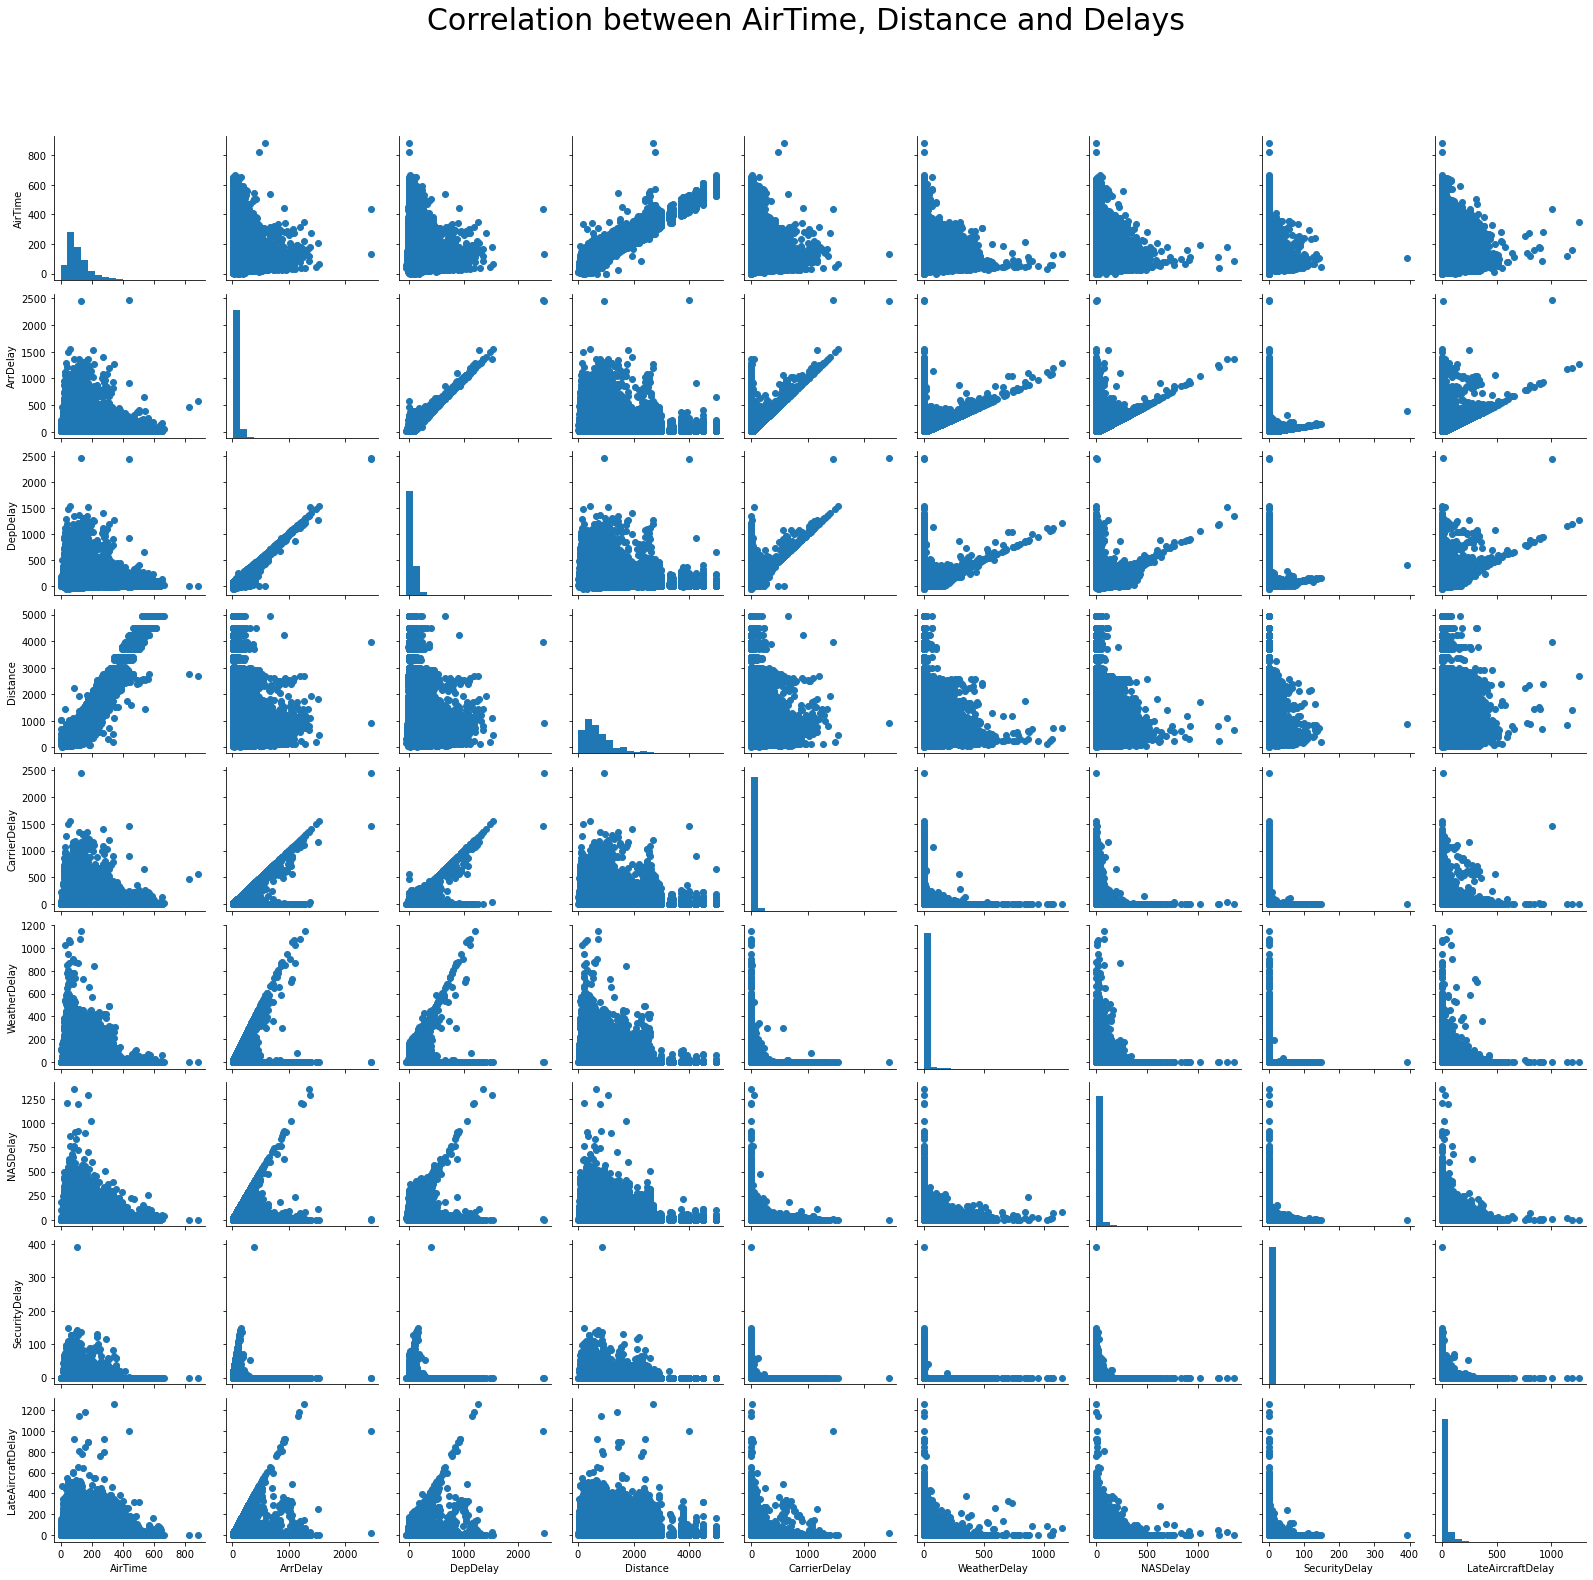

In [15]:
df_pair = df_delay.iloc [:,[6,12,13,14,17,20,21,22,23,24]]


#plot matrix of numeric variables

g = sb.PairGrid(data=df_pair, vars=['AirTime','ArrDelay', 'DepDelay','Distance','CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']);
g = g.map_diag(plt.hist, bins=20);
g.map_offdiag(plt.scatter);
plt.subplots_adjust(top=0.9)
plt.suptitle('Correlation between AirTime, Distance and Delays', size=30);

### Flights Cancellations

Delays can lead to flight cancellations.The pie chart visualization shows that out of the total flights,only 2.7% cancelled and four major reasons weather, carrier , NAS and security.


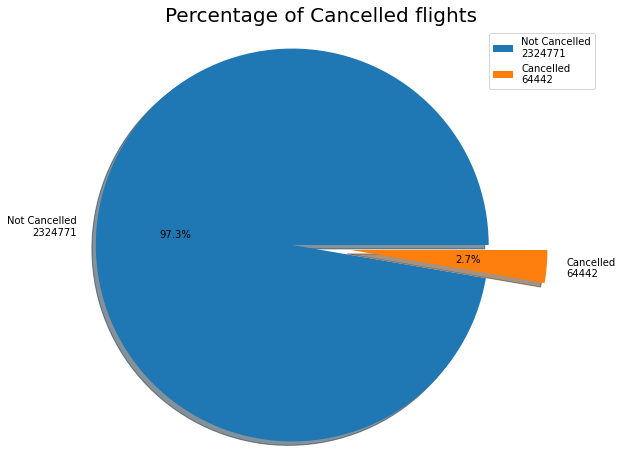

In [16]:
df_cancelled = flights['Cancelled'].value_counts()

# plot visualization

fig =plt.figure(figsize=(10,8))
labels =f'Not Cancelled\n{df_cancelled.values[0]}', f'Cancelled\n{df_cancelled.values[1]}'
explode = (0,0.3)
plt.pie(df_cancelled, explode = explode, labels=labels, autopct='%.1f%%', shadow =True)
plt.title('Percentage of Cancelled flights', fontsize = 20)
plt.axis('equal')
plt.legend(loc ='upper right')

# Display pie chart
plt.show()

### Cancellation reasons

The reasons were cancellation ranged from A -D 

A- Weather

B-  Carrier

C- NAS

D- Security

The barplot shows that weather was the major reason for cancellation.



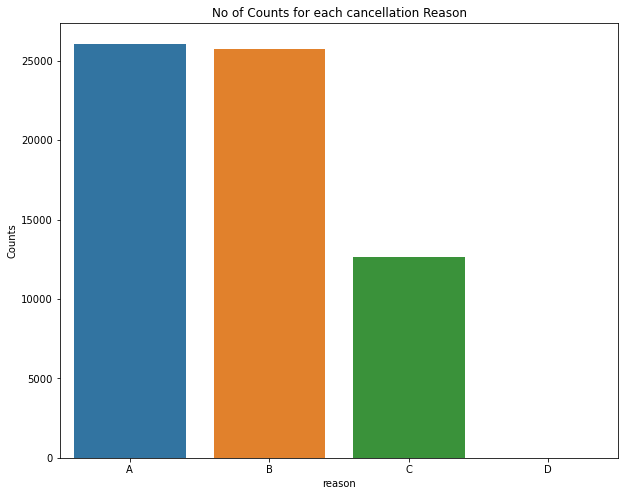

In [17]:
fig,ax = plt.subplots(figsize =(10,8))

df_reason = flights['CancellationCode'].value_counts().rename_axis('reason').reset_index()

df_reason.rename(columns={'CancellationCode': 'Counts'},inplace =True)

sb.barplot (data = df_reason, x ='reason', y ='Counts')

plt.title('No of Counts for each cancellation Reason')

plt.show()


### Engine_types

The engine types constitute of the Turbo-prop, Turbo-shaft, 4 cycle, Turbo Jet, Reciprocating and Turbo fan.

Different aircrafts operate on different engine types and with a focus on two delays that consitute the major cause of delay in the industry. A bar plot was used to visualize the engine types aganist their average delay in minutes.

The Turbo Prop engine type consitituted for the highest averge time for both the weather and carrier delay.

In [18]:
engine = df_delay.groupby('engine_type')[['CarrierDelay', 'WeatherDelay']].sum()

In [19]:
carrier_manufacturer = df_delay.groupby('manufacturer')[['CarrierDelay', 'WeatherDelay']].sum()

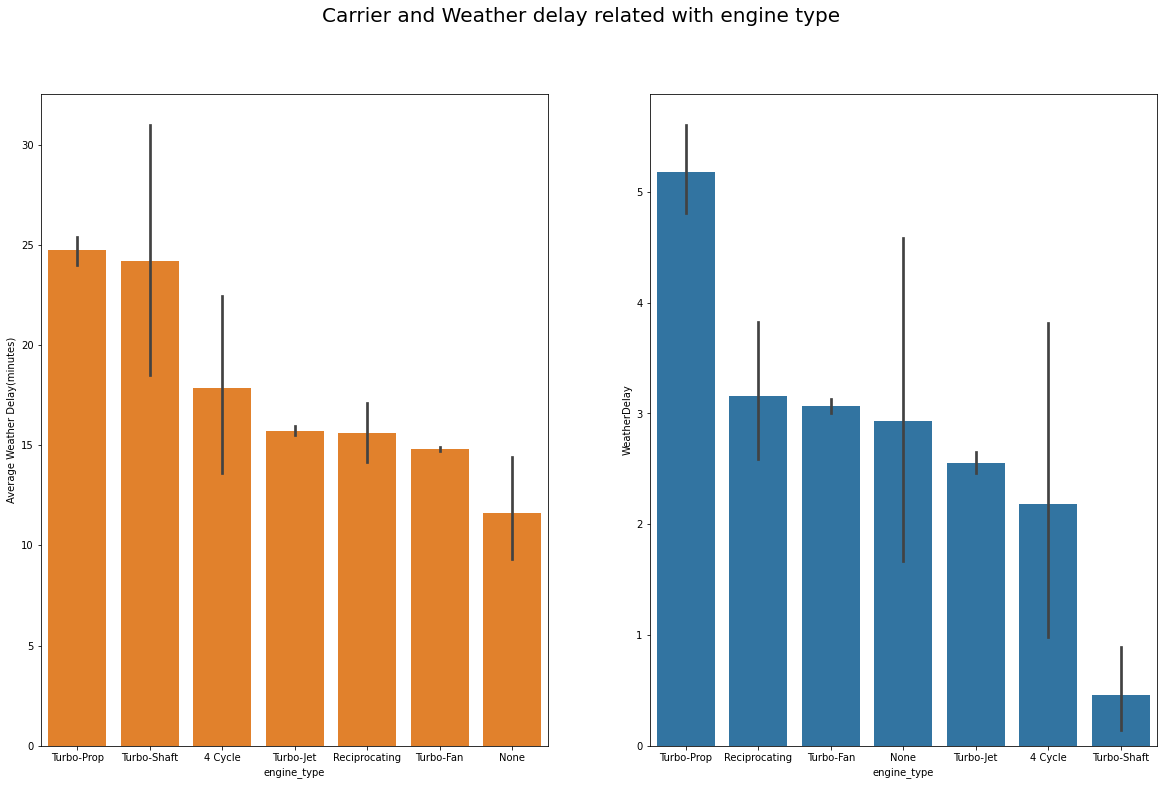

In [20]:
base_color3 = sb.color_palette()[1]
base_color2 = sb.color_palette()[0]

fig,ax = plt.subplots(1,2 , figsize=(20,12))

engine_carrier = df_delay.groupby('engine_type')['CarrierDelay'].mean().sort_values(ascending=False).index
engine_weather = df_delay.groupby('engine_type')['WeatherDelay'].mean().sort_values(ascending=False).index
sb.barplot(data = df_delay, x ='engine_type', y=df_delay['CarrierDelay'], color = base_color3, order = engine_carrier, ax=ax[0]);
sb.barplot(data = df_delay, x ='engine_type', y=df_delay['WeatherDelay'], color = base_color2, order = engine_weather, ax=ax[1])

ax[0].set_ylabel('Average Carrier Delay(minutes)')
ax[0].set_ylabel('Average Weather Delay(minutes)')
fig.suptitle('Carrier and Weather delay related with engine type', size =20);
plt.show()


### Overview of total number of engine types per airline

This part of my analysis will be a comparison between two plots. The heat map shows the total number of engine types owned by each airline while the bar plot will shows the delay types per airline on a stacked bar plot. 

The stacked bar plot shows the proportion of delay per airline while the heat map shows the number of engine types owned by each airline.

E.g for WN turbo fans engine type was used more than other engine type while carrier delay was low weather delay was higher and turbo fan is the third most cause of weather delay.

These can also been seen in FL which had only one engine type Turbo fan. It had a very low carrier delay with a high proportion of weather delay.

In [21]:
df_engine = df_delay.groupby(['UniqueCarrier', 'engine_type']).size().reset_index(name ='count')

In [22]:
#create pivot 

df_engine =df_engine.pivot(index ='UniqueCarrier', columns ='engine_type', values ='count')

Text(0.5, 1.0, 'Engine types per carrier')

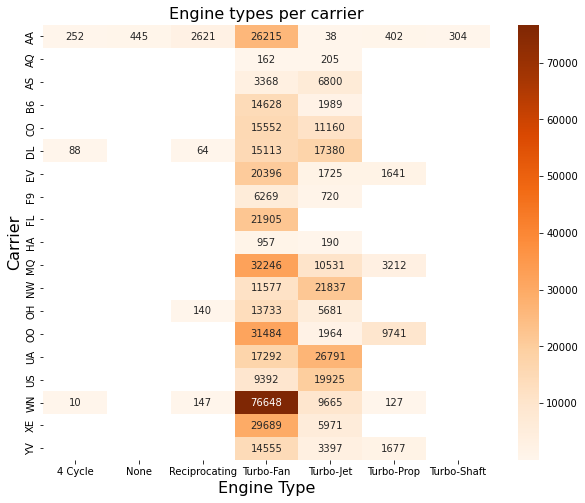

In [23]:
#plot heat map

fig,ax = plt.subplots(figsize =(10,8))

sb.heatmap(df_engine, annot =True, fmt ='.0f', cmap ='Oranges',ax=ax)
ax.set_xlabel('Engine Type', size=(16))
ax.set_ylabel('Carrier', size=(16))
plt.title( 'Engine types per carrier', size = 16)

Text(0.5, 1.0, 'Delays by Airlines')

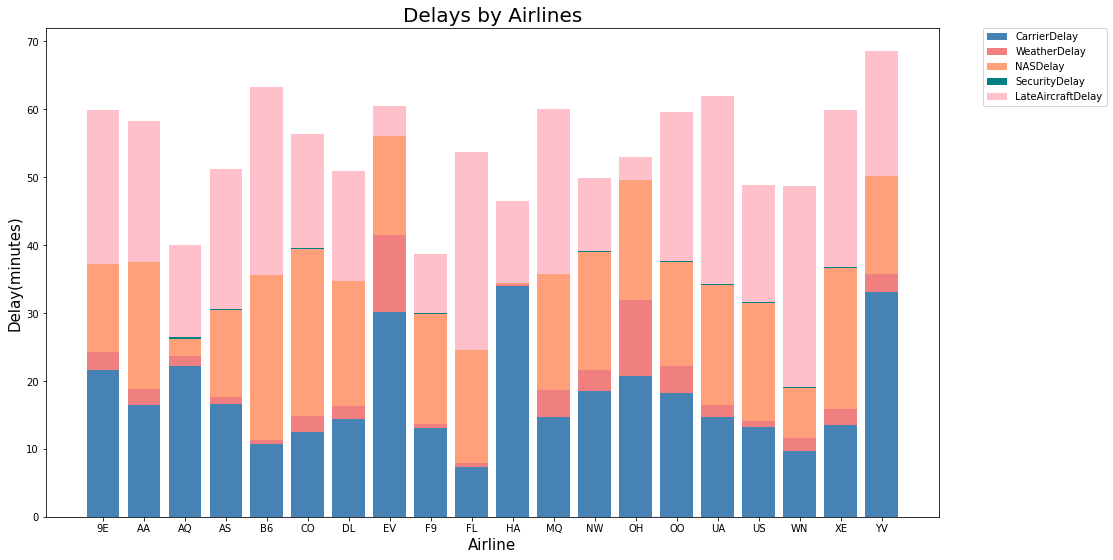

In [24]:
stacked_bar = df_delay.groupby('UniqueCarrier')[['CarrierDelay', 'WeatherDelay',
'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].mean()

color = ['mediumpurple', 'mocassin', 'lightsalmon', 'skyblue', 'aquamarine']

fig,ax = plt.subplots(figsize =(16,9))

ax.bar(stacked_bar.index, stacked_bar['CarrierDelay'], label='CarrierDelay', color = 'steelblue')
ax.bar(stacked_bar.index, stacked_bar['WeatherDelay'], bottom = stacked_bar['CarrierDelay'], label ='WeatherDelay', color = 'lightcoral')
ax.bar(stacked_bar.index, stacked_bar['NASDelay'], bottom = stacked_bar['CarrierDelay'] + stacked_bar['WeatherDelay'], label = 'NASDelay', color = 'lightsalmon')
ax.bar(stacked_bar.index, stacked_bar['SecurityDelay'], bottom = stacked_bar['CarrierDelay'] + stacked_bar['WeatherDelay'] + stacked_bar['NASDelay'], label = 'SecurityDelay' , color = 'teal' )
ax.bar(stacked_bar.index, stacked_bar['LateAircraftDelay'], bottom = stacked_bar['CarrierDelay'] + stacked_bar['WeatherDelay'] + stacked_bar['NASDelay'] + stacked_bar['SecurityDelay'], label = 'LateAircraftDelay', color = 'pink')
ax.legend(bbox_to_anchor= (1.05, 1), loc='upper left', borderaxespad=0) 

ax.set_xlabel('Airline', size =15)
ax.set_ylabel('Delay(minutes)',size =15)


plt.title('Delays by Airlines', size =20)

### Conclusion

A total of 20 Airlines were in the 2008 datasets which spanned within January to April 2008 with southwestern airlines having the most flights and Aloha airlines(AQ) having the least number.

The weather delay also accounted for the most delay and cancellation reason with security being the least.

The engine types which causes the most weather and carrier delay was the Turbo-Prop engine type.

So when next your flight is being delayed or cancelled it could be due as a result of the delays addressed in the course of my analysis and weather delays is most likely to be the reason for the delay. 

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [26]:
!jupyter nbconvert Michelle_Ezeokeke_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Michelle_Ezeokeke_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 1219412 bytes to Michelle_Ezeokeke_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\ezeok\anaconda\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\ezeok\anaconda\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\ezeok\anaconda\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\ezeok\anaconda\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\ezeok\anaconda\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_no

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 